In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

$y$ is calculated by using the relation $$ y = 2.5x + 5 + \text(noise) $$

In [28]:
x = np.random.rand(100) * 10
noise = np.random.normal(0, 2, size = x.shape)
y = 2.5 * x + 5 + noise

In [29]:
x_reshaped = x.reshape(-1, 1)
model = LinearRegression().fit(x_reshaped, y)
y_pred = model.predict(x_reshaped)

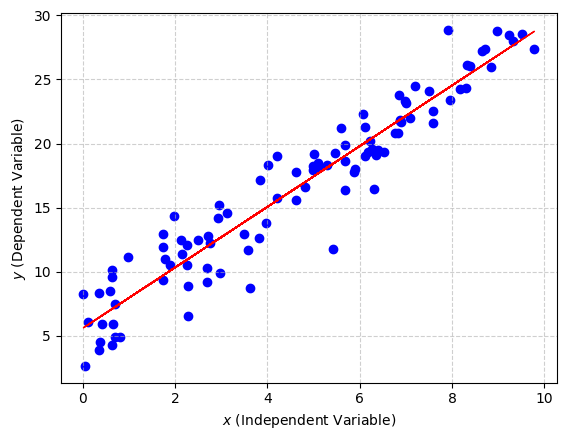

In [34]:
fix, ax = plt.subplots()

ax.scatter(x, y, color = "blue")
ax.plot(x, y_pred, color = "red", linewidth = 1)

ax.set_xlabel(r"$x$ (Independent Variable)")
ax.set_ylabel(r"$y$ (Dependent Variable)")

ax.grid(True, linestyle = '--', alpha = 0.6)

plt.show()